In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
D=pd.read_csv("/content/abalone.txt",sep=',',
  names=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings'])
D.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


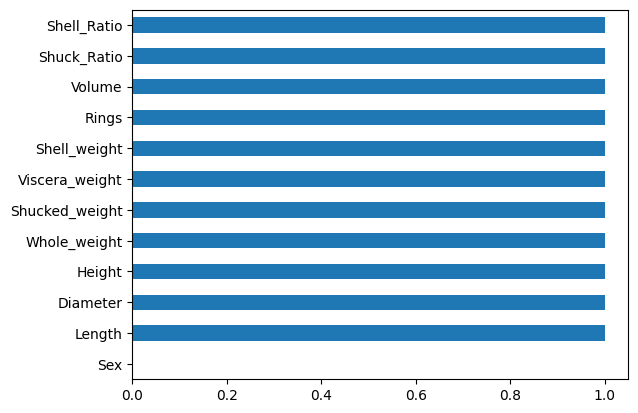

In [47]:
D.isnull().sum().plot(kind='barh')
plt.show()

In [48]:
D.dropna(inplace=True)

In [49]:
D.loc[:,'Sex']=D.Sex.apply(lambda x: 'A' if x!='I' else 'I')
D.head()

<ipython-input-49-2bec31657dca>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  D.loc[:,'Sex']=D.Sex.apply(lambda x: 'A' if x!='I' else 'I')


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Volume,Shuck_Ratio,Shell_Ratio
0,A,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0.015777,0.436770,0.010000
1,A,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0.008347,0.441242,0.010000
2,A,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,0.030051,0.378877,0.023333
3,A,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0.020075,0.417636,0.015500
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0.006732,0.436585,0.007857


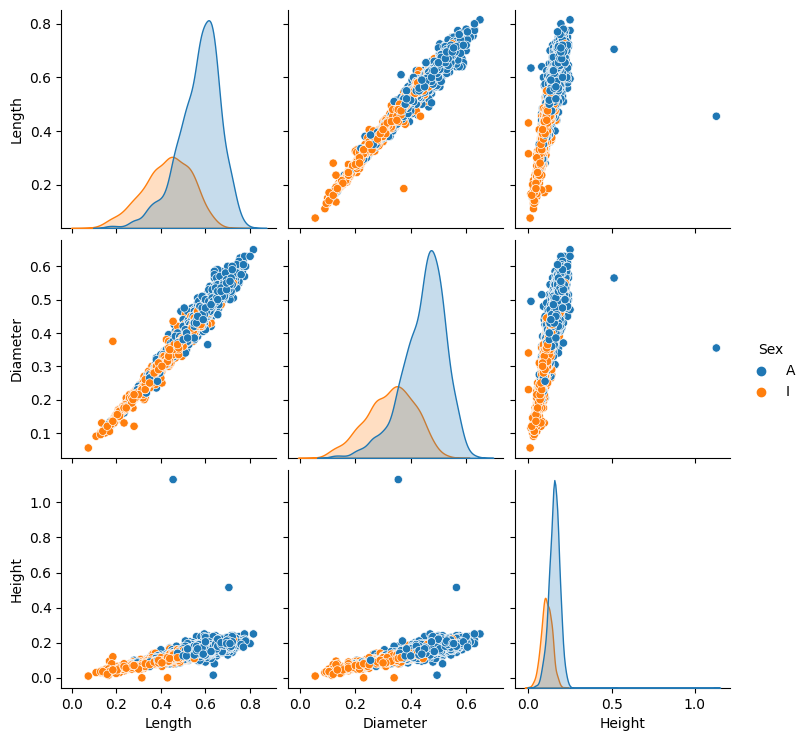

In [50]:
sb.pairplot(data=D.loc[:,['Length','Diameter','Height','Sex']],hue='Sex')
plt.show()

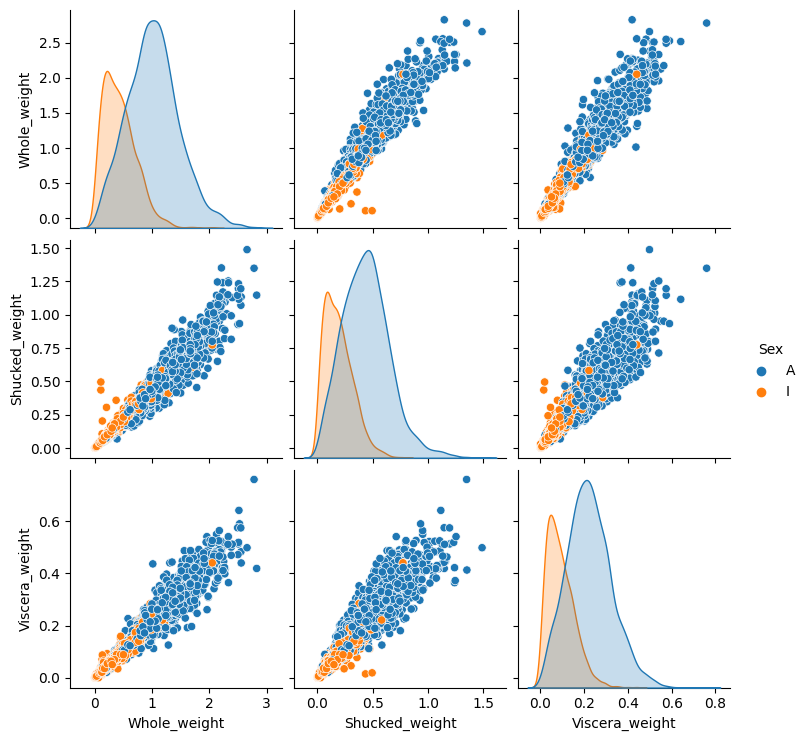

In [51]:
sb.pairplot(data=D.loc[:,['Whole_weight','Shucked_weight','Viscera_weight','Sex']],hue='Sex')
plt.show()

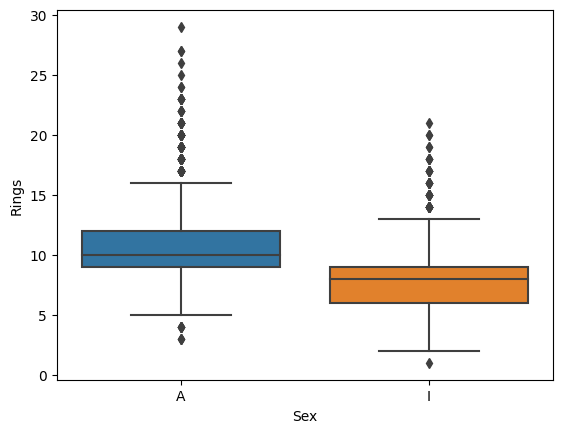

In [21]:
sb.boxplot(data=D.loc[:,['Sex','Rings']],x='Sex',y='Rings')
plt.show()

In [52]:
D.loc[:,"Volume"]=D.Length*D.Diameter*D.Height
D.loc[:,"Shuck_Ratio"]=D.Shucked_weight/D.Whole_weight
D.loc[:,"Shell_Ratio"]=D.Shell_weight/D.Rings
D.head()

<ipython-input-52-195531849986>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  D.loc[:,"Volume"]=D.Length*D.Diameter*D.Height
<ipython-input-52-195531849986>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  D.loc[:,"Shuck_Ratio"]=D.Shucked_weight/D.Whole_weight
<ipython-input-52-195531849986>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  D.loc[:,"Shell_Ratio"]=D.Shell_weight/D.Rings


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Volume,Shuck_Ratio,Shell_Ratio
0,A,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0.015777,0.436770,0.010000
1,A,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0.008347,0.441242,0.010000
2,A,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,0.030051,0.378877,0.023333
3,A,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0.020075,0.417636,0.015500
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0.006732,0.436585,0.007857


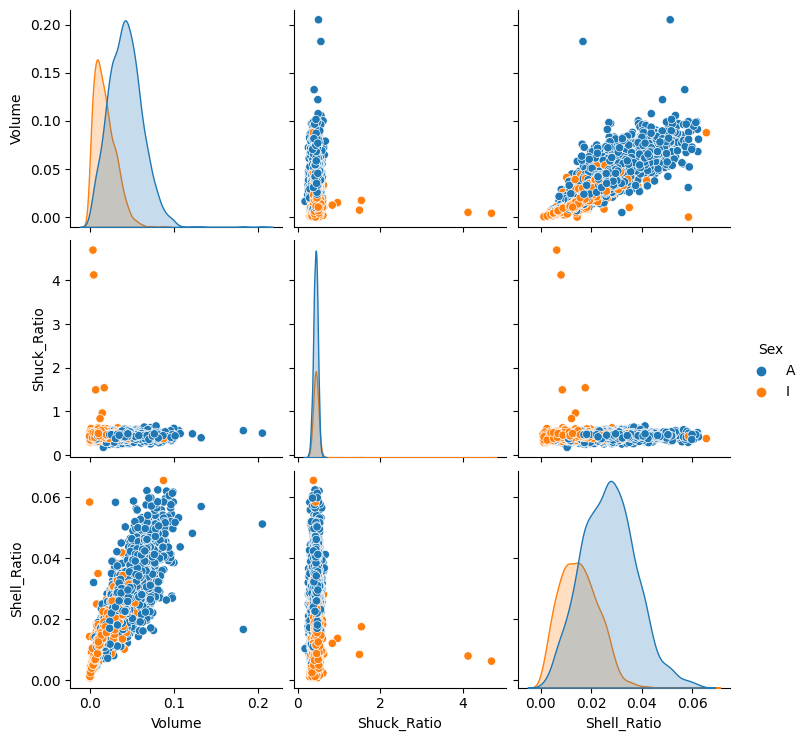

In [53]:
sb.pairplot(data=D.loc[:,['Volume','Shuck_Ratio','Shell_Ratio','Sex']],hue='Sex')
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(D[['Rings','Volume','Shuck_Ratio','Shell_Ratio','Viscera_weight',
                                                       'Length','Height','Diameter','Whole_weight','Shucked_weight']],
                                                    D.loc[:,'Sex'],
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=D.Sex)

In [56]:
M1=KNeighborsClassifier()
M2=SVC()
M3=DecisionTreeClassifier()

In [57]:
pg_1={'n_neighbors':[3,5,7],'leaf_size':[10,15,20]}
pg_2={'kernel':['linear','rbf'],'degree':[3,4,5]}
pg_3={'max_depth':[5,8,11],'min_samples_leaf':[5,10,15]}

In [58]:
MG1 = GridSearchCV(M1, pg_1).fit(X_train, y_train)

In [80]:
for key in ['mean_test_score','std_test_score','param_leaf_size','param_n_neighbors']:
  print(key,':',MG1.cv_results_[key])

mean_test_score : [0.79317329 0.80365144 0.81502645 0.79317329 0.80365144 0.81502645
 0.79317329 0.80365144 0.81502645]
std_test_score : [0.01034775 0.01203036 0.01305616 0.01034775 0.01203036 0.01305616
 0.01034775 0.01203036 0.01305616]
param_leaf_size : [10 10 10 15 15 15 20 20 20]
param_n_neighbors : [3 5 7 3 5 7 3 5 7]


In [60]:
MG2 = GridSearchCV(M2, pg_2).fit(X_train, y_train)

In [81]:
for key in ['mean_test_score','std_test_score','param_degree','param_kernel']:
  print(key,':',MG2.cv_results_[key])

mean_test_score : [0.81353168 0.81023603 0.81353168 0.81023603 0.81353168 0.81023603]
std_test_score : [0.01043026 0.006391   0.01043026 0.006391   0.01043026 0.006391  ]
param_degree : [3 3 4 4 5 5]
param_kernel : ['linear' 'rbf' 'linear' 'rbf' 'linear' 'rbf']


In [62]:
MG3 = GridSearchCV(M3, pg_3).fit(X_train, y_train)

In [82]:
for key in ['mean_test_score','std_test_score','param_max_depth','param_min_samples_leaf']:
  print(key,':',MG3.cv_results_[key])

mean_test_score : [0.81263034 0.81562436 0.81562436 0.78987764 0.80035982 0.80335383
 0.78089919 0.79766566 0.80245652]
std_test_score : [0.00718788 0.01246263 0.01025271 0.02080757 0.00948178 0.00927128
 0.02316697 0.0147667  0.01100041]
param_max_depth : [5 5 5 8 8 8 11 11 11]
param_min_samples_leaf : [5 10 15 5 10 15 5 10 15]


In [73]:
P1=MG1.best_estimator_.predict(X_test)
print('Accuracy:',accuracy_score(y_test,P1))
confusion_matrix(y_test,P1)

Accuracy: 0.8397129186602871


array([[509,  58],
       [ 76, 193]])

In [74]:
P2=MG2.best_estimator_.predict(X_test)
print('Accuracy:',accuracy_score(y_test,P2))
confusion_matrix(y_test,P2)

Accuracy: 0.8433014354066986


array([[502,  65],
       [ 66, 203]])

In [75]:
P3=MG3.best_estimator_.predict(X_test)
print('Accuracy:',accuracy_score(y_test,P3))
confusion_matrix(y_test,P3)

Accuracy: 0.8349282296650717


array([[506,  61],
       [ 77, 192]])

In [84]:
X_test.tail(3)

,Rings,Volume,Shuck_Ratio,Shell_Ratio,Viscera_weight,Length,Height,Diameter,Whole_weight,Shucked_weight
255,15.0,0.044100,0.379327,0.024667,0.2065,0.56,0.175,0.450,1.0110,0.3835
4017,11.0,0.063327,0.470977,0.016182,0.2850,0.66,0.190,0.505,1.4385,0.6775
2206,5.0,0.004894,0.367857,0.008000,0.0235,0.29,0.075,0.225,0.1400,0.0515


In [79]:
for k in range(3):
  a1=float(input('Rings'))
  a2=float(input('Volume'))
  a3=float(input('Shuck_Ratio'))
  a4=float(input('Shell_Ratio'))
  a5=float(input('Viscera_weight'))
  a6=float(input('Length'))
  a7=float(input('Height'))
  a8=float(input('Diameter'))
  a9=float(input('Whole_weight'))
  a10=float(input('Shucked_weight'))
  user_data=pd.DataFrame({'Rings':[a1],'Volume':[a2],
                          'Shuck_Ratio':[a3],'Shell_Ratio':[a4],
                          'Viscera_weight':[a5],'Length':[a6],
                          'Height':[a7],'Diameter':[a8],
                          'Whole_weight':[a9],'Shucked_weight':[a10]})
  print('Selected abalone is:',['Adult' if x=='A' else 'Infant' for x in MG2.best_estimator_.predict(user_data)][0])

Rings12
Volume1
Shuck_Ratio1
Shell_Ratio2
Viscera_weight3
Length5
Height6
Diameter5
Whole_weight4
Shucked_weight3
Selected abalone is: Adult
